In [10]:
using DrWatson
using DataFrames
using HDF5
using Statistics

In [196]:
datapath = "/Users/mr/2020-10-29"

"/Users/mr/2020-10-29"

In [197]:
records = map(readdir(datapath)) do fname
    prefix, params, suffix = parse_savename(fname)
    params = DataFrame(params)
    params["filename"] = fname
    params
end
df = vcat(records...)
sort!(df, [:duration, :N])

,N,duration,num_responses,filename
,Int64,Float64,Int64,String
1,1,20.0,500,N=1_duration=20_num_responses=500.hdf5
2,2,20.0,500,N=2_duration=20_num_responses=500.hdf5
3,3,20.0,500,N=3_duration=20_num_responses=500.hdf5
4,4,20.0,500,N=4_duration=20_num_responses=500.hdf5
5,5,20.0,500,N=5_duration=20_num_responses=500.hdf5
6,6,20.0,500,N=6_duration=20_num_responses=500.hdf5
7,7,20.0,500,N=7_duration=20_num_responses=500.hdf5
8,8,20.0,500,N=8_duration=20_num_responses=500.hdf5
9,9,20.0,500,N=9_duration=20_num_responses=500.hdf5


In [198]:
me_merged = DataFrame()
ce_merged = DataFrame()
for (duration, group) in pairs(groupby(df, :duration))
    local me = DataFrame()
    local ce = DataFrame()
    for fname in group.filename
        h5open(joinpath(datapath, fname)) do h5f
            dict = DataFrame()
            for obj in h5f["marginal_entropy"]
                dict[name(obj)] = read(obj)
            end
            me = vcat(me, dict; cols=:union)
            
            dict = DataFrame()
            for obj in h5f["conditional_entropy"]
                dict[name(obj)] = read(obj)
            end
            ce = vcat(ce, dict; cols=:union)
        end
    end
    me[:duration] = duration
    ce[:duration] = duration
    me_merged = vcat(me_merged, me; cols=:union)
    ce_merged = vcat(ce_merged, ce; cols=:union)
end

In [199]:
me_merged

,/marginal_entropy/GcTime,/marginal_entropy/Sample,/marginal_entropy/TimeElapsed
,Float64,Float64,Float64
1,0.1312,41.0156,3.09723
2,0.0435726,37.348,0.577698
3,0.0639678,36.6375,0.590016
4,0.0423642,31.8075,0.53106
5,0.0644234,39.199,0.621866
6,0.0428688,33.8339,0.550566
7,0.0430164,33.5568,0.550506
8,0.0643534,36.122,0.588271
9,0.0428468,36.4668,0.566871


In [200]:
save(joinpath(datapath, "me.csv"), me_merged)
save(joinpath(datapath, "ce.csv"), ce_merged)

In [12]:
# me_merged = DataFrame(load(joinpath(datapath, "me.csv")))
# ce_merged = DataFrame(load(joinpath(datapath, "ce.csv")))

In [201]:
gaussian_data = DataFrame(load(projectdir("data", "gaussian_data", "gaussian_data.csv")))

,N,times,delta_t,mi
,Int64,Int64,Float64,Float64
1,328,20,0.0610352,0.191651
2,492,30,0.0610352,0.209987
3,655,40,0.0610352,0.228208
4,819,50,0.0610352,0.246538
5,983,60,0.0610352,0.264866
6,1147,70,0.0610352,0.283191
7,1311,80,0.0610352,0.301515
8,1475,90,0.0610352,0.319838
9,1638,100,0.0610352,0.338048


In [202]:
me = combine(groupby(me_merged, :duration), 
    "/marginal_entropy/Sample" => mean => :me, 
    "/marginal_entropy/Sample" => (x->var(x)/length(x)) => :var
)

,duration,me,var
,Float64,Float64,Float64
1,20.0,35.6355,0.000277154
2,26.799,47.0908,0.000404563
3,35.909,62.4585,0.000595217
4,48.116,83.0393,0.000902887
5,64.472,110.52,0.00137437
6,86.389,147.491,0.00216206
7,115.756,196.72,0.00340165
8,155.106,263.046,0.00530857
9,207.833,351.765,0.00852886


In [203]:
ce = combine(groupby(ce_merged, :duration), 
    "/conditional_entropy/Sample" => mean => :ce, 
    "/conditional_entropy/Sample" => (x->var(x)/length(x)) => :var
)

,duration,ce,var
,Float64,Float64,Float64
1,20.0,35.6061,1.42169e-5
2,26.799,47.0281,2.04894e-5
3,35.909,62.3324,3.01726e-5
4,48.116,82.8367,4.52857e-5
5,64.472,110.299,6.976e-5
6,86.389,147.115,0.000108473
7,115.756,196.426,0.000171314
8,155.106,262.519,0.000271157
9,207.833,351.102,0.00042919


In [204]:
error = sqrt.(me.var + ce.var)

12-element Array{Float64,1}:
 0.01706958154766277
 0.020616811135444127
 0.025007784591385553
 0.030792410350520966
 0.038001760224770684
 0.047650064347217934
 0.059774298541875985
 0.0746975527138381
 0.09464698842358575
 0.11859680871700228
 0.14762729150868162
 0.18277409074716675

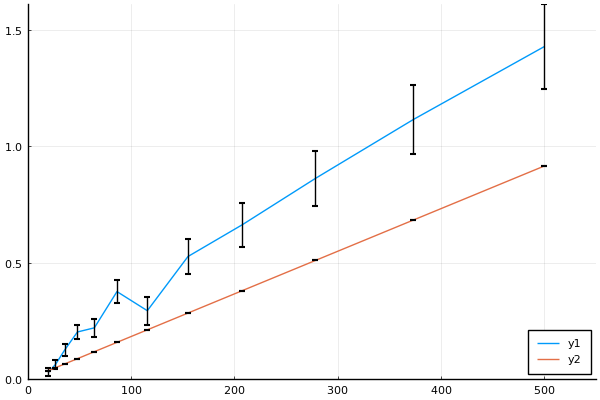

In [205]:
using Plots

p1 = plot(me.duration, [(me.me - ce.ce), 0.00183 .* me.duration], yerr=[error, zeros(size(error))]', ylim=(0, :auto), xlim=(0, 550), legend=:bottomright)

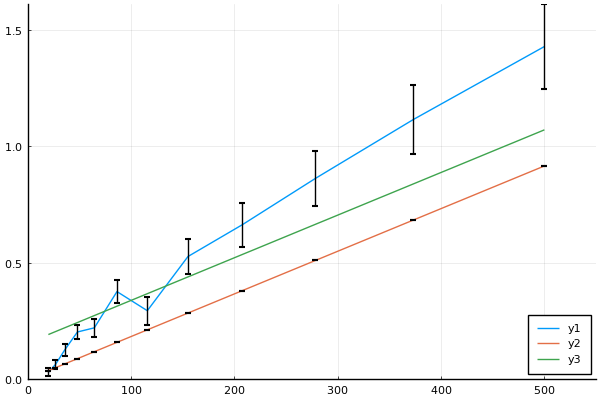

In [206]:
plot!(p1, gaussian_data.times, gaussian_data.mi)

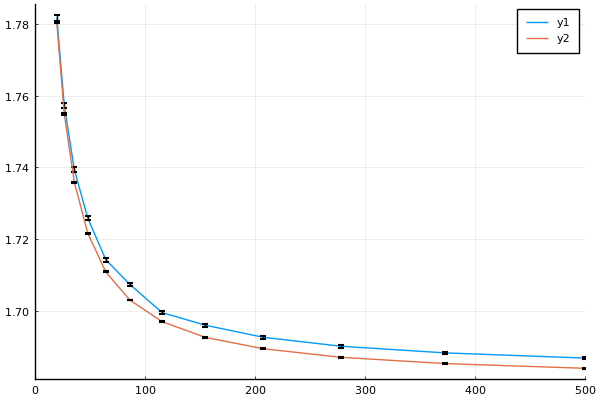

In [207]:
plot(me.duration, [me.me ./ me.duration, ce.ce ./ ce.duration], yerr=[sqrt.(me.var) ./ me.duration, sqrt.(ce.var) ./ ce.duration]', xlim=(0, :auto))

In [77]:
import GaussianMcmc
using LinearAlgebra

function gaussian_mi(N, delta_t)
    t = GaussianMcmc.time_matrix(N, delta_t)
    system = GaussianMcmc.System()
    c_z = GaussianMcmc.corr_z(system, t)
    c_ss = c_z[1:N,1:N]
    c_xx = c_z[N+1:2N,N+1:2N]
    
    0.5 * (logdet(c_ss) + logdet(c_xx) - logdet(c_z))
end

times = 20:10:500
Nmax = 8192
delta_t = times[end] / Nmax

N = map(x->round(Int, x), times ./ delta_t)

mi = gaussian_mi.(N, delta_t)

gaussian_data = DataFrame(:N => N, :times => times, :delta_t => delta_t, :mi => mi)

,N,times,delta_t,mi
,Int64,Int64,Float64,Float64
1,328,20,0.0610352,0.191651
2,492,30,0.0610352,0.209987
3,655,40,0.0610352,0.228208
4,819,50,0.0610352,0.246538
5,983,60,0.0610352,0.264866
6,1147,70,0.0610352,0.283191
7,1311,80,0.0610352,0.301515
8,1475,90,0.0610352,0.319838
9,1638,100,0.0610352,0.338048


In [82]:
save(projectdir("data", "gaussian_data", "gaussian_data.csv"), gaussian_data)

In [52]:
me_groups = map(x->x["/marginal_entropy/Sample"], groupby(me_merged, :duration))

,duration,x1
,Int64,Float64
1,50,89.0175
2,50,83.0175
3,50,71.9641
4,50,89.7106
5,50,91.5359
6,50,85.5942
7,50,86.212
8,50,78.2535
9,50,74.8465


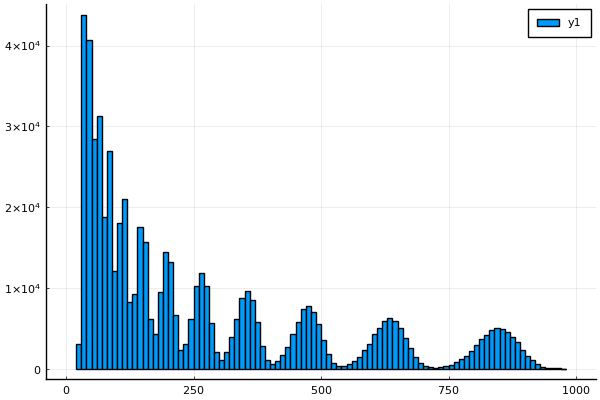

In [208]:
histogram(me_merged["/marginal_entropy/Sample"])

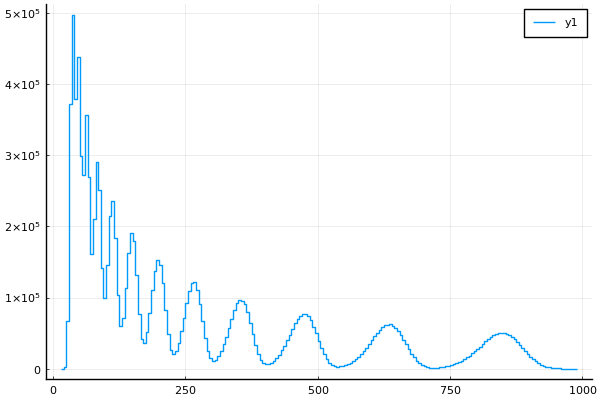

In [209]:
histogram(ce_merged["/conditional_entropy/Sample"])

In [69]:
function optimize_system(A, κ)
    f1 = sqrt(A/(2κ))
    λinv = 4f1*(2*(f1-1) + (f1^2 - 1)/f1)
    smean = κ*λinv
    ρ = (f1^2 - 1)/λinv
    rate = 1/(2λinv) * (f1 - 1)
    @show smean, rate
    nothing
end

Iᵣ(ρ,λ) = λ/2 * (sqrt(1+ρ/λ) - 1)
rtot(κ, ρ, λ) = 2κ*(1+ρ/λ)

rtot (generic function with 1 method)

In [53]:
optimize_system(10, 1)

(smean, rate) = (170.4396134799765, 0.00362611705184665)


In [62]:
Iᵣ.(rho, lambda)

20×20 Array{Float64,2}:
 0.00207107  0.00224745  0.00232051  …  0.00246621  0.00246794  0.00246951
 0.00366025  0.00414214  0.00436492     0.00486833  0.00487492  0.00488088
 0.005       0.00581139  0.0062132      0.00721111  0.00722524  0.00723805
 0.00618034  0.00732051  0.00791288     0.00949874  0.00952272  0.00954451
 0.00724745  0.00870829  0.0094949      0.0117349   0.0117708   0.0118034
 0.00822876  0.01        0.0109808   …  0.013923    0.0139725   0.0140175
 0.00914214  0.0112132   0.0123861      0.016066    0.0161306   0.0161895
 0.01        0.0123607   0.0137228      0.0181665   0.0182475   0.0183216
 0.0108114   0.0134521   0.015          0.020227    0.0203256   0.0204159
 0.0115831   0.0144949   0.016225       0.0222497   0.0223669   0.0224745
 0.0123205   0.0154951   0.0174037   …  0.0242366   0.0243734   0.024499
 0.0130278   0.0164575   0.018541       0.0261895   0.0263466   0.0264911
 0.0137083   0.0173861   0.019641       0.0281101   0.0282883   0.0284523
 0.0143649 

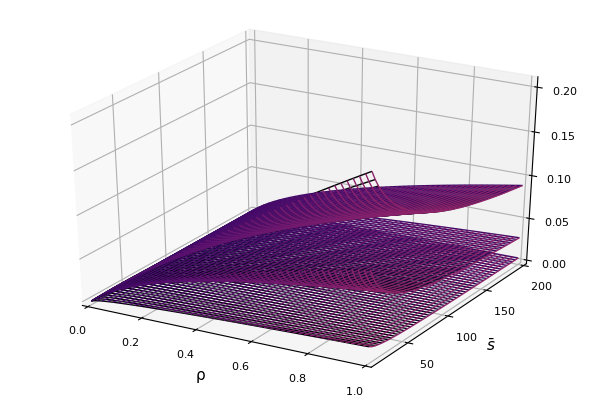

In [120]:
using LaTeXStrings
pyplot()
rho = range(0,1, length=50)
smean = range(10, 200, length=50)
kappa = 0.1
p = plot()
for kappa in [0.01, 0.7, 10]
    wireframe!(p, rho, smean, Iᵣ.(rho', (kappa ./ smean)), xlabel="ρ", ylabel=L"\bar{s}", label="$kappa")
end
p
# wireframe!(p, rho, lambda, rtot.(kappa, rho, lambda'))

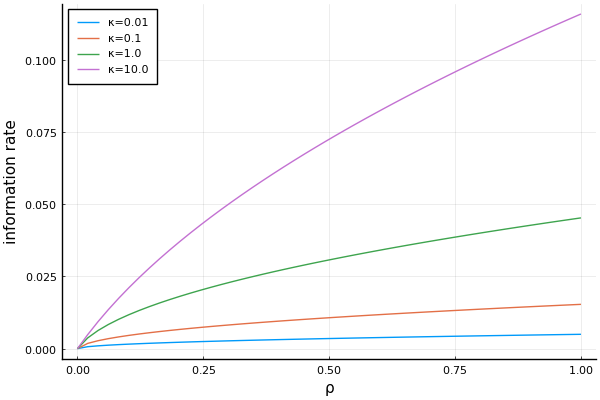

In [132]:
rho = range(0,1, length=50)
kappa = 10 .^ range(-2, 1, length=4)
smean = 100
plot(rho, Iᵣ.(rho, (kappa ./ smean)'), ylabel="information rate", xlabel="ρ", label=hcat(("κ=$k" for k in kappa)...))

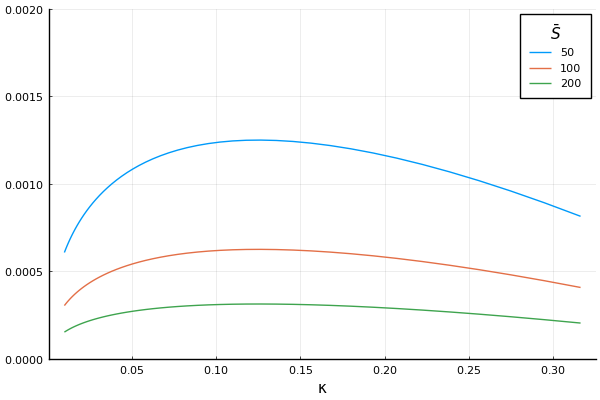

In [192]:
infrate(κ, smean, rtot) = κ/(2smean) * (sqrt(rtot/(2κ)) - 1)

rt = 1
smean = [50, 100, 200]'
κ = 10 .^ range(-2, -0.5, length=50)

plot(κ, infrate.(κ, smean, rt), ylim=(0,0.002), label=smean, legendtitle=L"\bar{S}", xlabel="κ")

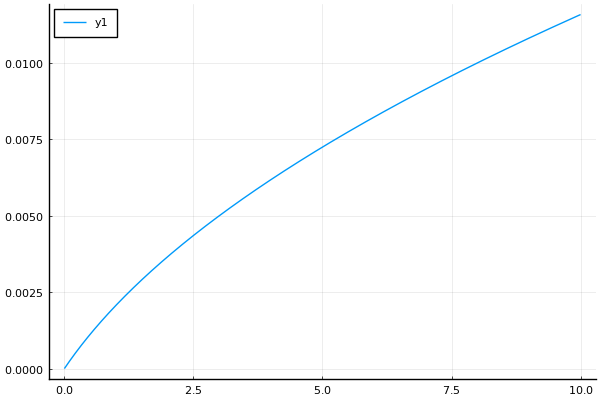

In [213]:
plot(0:0.01:10, x -> 1/(2*100) * (sqrt(1 + x) - 1))

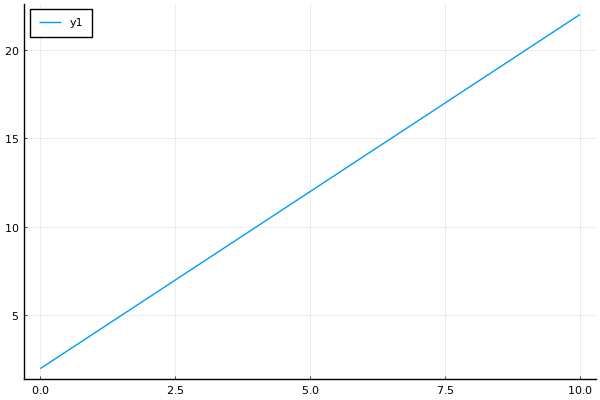

In [214]:
plot(0:0.01:10, x -> 2*100*(1/100 + x/100))